In [1]:
from models import fc
from datasets import mnist
from logger import Logger
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [3]:
import numpy as np
import pickle
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
batch_size = 256
input_dim = 784
classes = 10
learning_rate = 0.001
reg = 0.01

epochs = 5

In [5]:
def compute_accuracy(model, dataloader):
    
    correct, total = 0.0, 0.0
    
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        outputs = model(Variable(inputs))
        _, pred = torch.max(outputs.data, 1)
        
        correct += torch.eq(pred, labels).sum()
        total += labels.size(0)
    
    return correct/float(total)

In [6]:
train_data, valid_data, test_data = mnist.MNIST.load_data(batch_size)
model = fc.FullyConnected(input_dim, classes)

loss_criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=reg)

In [7]:
losses = []
valid_accs = []
train_accs = []

for epoch in xrange(epochs):
    
    for i, data in enumerate(train_data):
        inputs, labels = data
        inputs = Variable(inputs)
        labels_var = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = loss_criteria(outputs, labels_var)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data[0])
        print "\t Iteration %d : Loss: %f" % (i, loss.data[0])
    
    train_acc = compute_accuracy(model, train_data)
    valid_acc = compute_accuracy(model, valid_data)
    
    train_accs.append(train_acc)
    valid_accs.append(valid_acc)
    print "Epoch %d complete. Training acc: %f. Validation accuracy: %f" % (epoch, train_acc, valid_acc)

	 Iteration 0 : Loss: 2.319585
	 Iteration 1 : Loss: 2.186539
	 Iteration 2 : Loss: 2.103302
	 Iteration 3 : Loss: 2.012423
	 Iteration 4 : Loss: 1.937125
	 Iteration 5 : Loss: 1.930303
	 Iteration 6 : Loss: 1.907690
	 Iteration 7 : Loss: 1.880185
	 Iteration 8 : Loss: 1.795940
	 Iteration 9 : Loss: 1.790284
	 Iteration 10 : Loss: 1.769628
	 Iteration 11 : Loss: 1.735602
	 Iteration 12 : Loss: 1.739938
	 Iteration 13 : Loss: 1.685217
	 Iteration 14 : Loss: 1.640888
	 Iteration 15 : Loss: 1.600363
	 Iteration 16 : Loss: 1.622437
	 Iteration 17 : Loss: 1.565709
	 Iteration 18 : Loss: 1.543736
	 Iteration 19 : Loss: 1.549920
	 Iteration 20 : Loss: 1.482140
	 Iteration 21 : Loss: 1.488100
	 Iteration 22 : Loss: 1.427381
	 Iteration 23 : Loss: 1.410156
	 Iteration 24 : Loss: 1.436035
	 Iteration 25 : Loss: 1.356870
	 Iteration 26 : Loss: 1.367935
	 Iteration 27 : Loss: 1.377845
	 Iteration 28 : Loss: 1.292687
	 Iteration 29 : Loss: 1.263270
	 Iteration 30 : Loss: 1.261514
	 Iteration 31 : L

In [8]:
test_acc = compute_accuracy(model, test_data)
print "Test accuracy: %f" % (test_acc)

Test accuracy: 0.968500


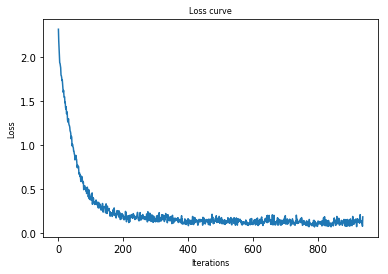

In [9]:
# Plot loss

plt.plot(losses)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Loss', fontsize=8)
plt.title('Loss curve', fontsize=8)
plt.savefig('results/1-fc-mnist/loss_curve.png')

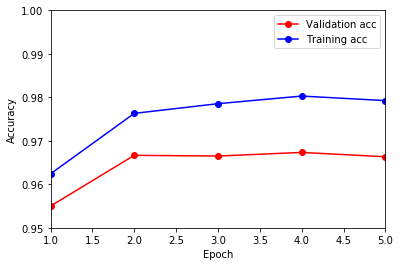

In [10]:
# Plot validation and train accuracy

plt.plot(range(1, epochs+1), valid_accs, 'r-o')
plt.plot(range(1, epochs+1), train_accs, 'b-o')
plt.xlim(1, epochs)
plt.ylim(0.95, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation acc', 'Training acc'])
plt.savefig('results/1-fc-mnist/train_val_acc.png')

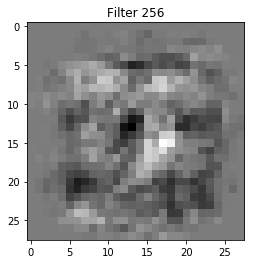

In [11]:
# Visualize FC1 weights

fc1_weight = model.state_dict()['fc1.weight']
fc1_img = fc1_weight.view(-1, 28, 28)
img_size = fc1_img.shape[0]

for i in xrange(img_size):
    filter_img = fc1_img[i]
    
    plt.imshow(filter_img.numpy(), cmap='gray')
    plt.title('Filter %d' % (i+1))
    plt.savefig('results/1-fc-mnist/fc1-vis/filter-%d.png' % (i+1))

In [12]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [13]:
# fc4 stores the hidden 64-dimensional encoding of the images. Visualize using t-SNE

img_labels = np.array([])
raw_outputs = np.array([])

def capture_fc4_out(model, inputs):
    global raw_outputs
    input_np = inputs[0].data.numpy()
    
    if raw_outputs.shape[0] <= 0:
        raw_outputs = input_np
    else:
        raw_outputs = np.append(raw_outputs, input_np, axis=0)
    

hook_handle = model.fc4.register_forward_pre_hook(capture_fc4_out)
cnt = 0

try:
    for i, data in enumerate(test_data):

        inputs, labels = data
        inputs = Variable(inputs)

        output = model(inputs)

        if img_labels.shape[0] <= 0:
            img_labels = labels.numpy()
        else:
            img_labels = np.append(img_labels, labels.numpy())

        cnt += labels.shape[0]
        print "%d processed" % cnt
finally:
    hook_handle.remove()

print "Running TSNE"
fc4_tsne_codes = TSNE(n_components=2).fit_transform(raw_outputs)
print fc4_tsne_codes.shape

print "Running PCA"
fc4_pca_codes = PCA(n_components=2).fit_transform(raw_outputs)

print fc4_pca_codes.shape 
print img_labels.shape

256 processed
512 processed
768 processed
1024 processed
1280 processed
1536 processed
1792 processed
2048 processed
2304 processed
2560 processed
2816 processed
3072 processed
3328 processed
3584 processed
3840 processed
4096 processed
4352 processed
4608 processed
4864 processed
5120 processed
5376 processed
5632 processed
5888 processed
6144 processed
6400 processed
6656 processed
6912 processed
7168 processed
7424 processed
7680 processed
7936 processed
8192 processed
8448 processed
8704 processed
8960 processed
9216 processed
9472 processed
9728 processed
9984 processed
10000 processed
Running TSNE
(10000, 2)
Running PCA
(10000, 2)
(10000,)


In [14]:
np.save('results/1-fc-mnist/fc_out_tsne/tsne_embedding', fc4_tsne_codes)
np.save('results/1-fc-mnist/fc_out_tsne/pca_embedding', fc4_pca_codes)

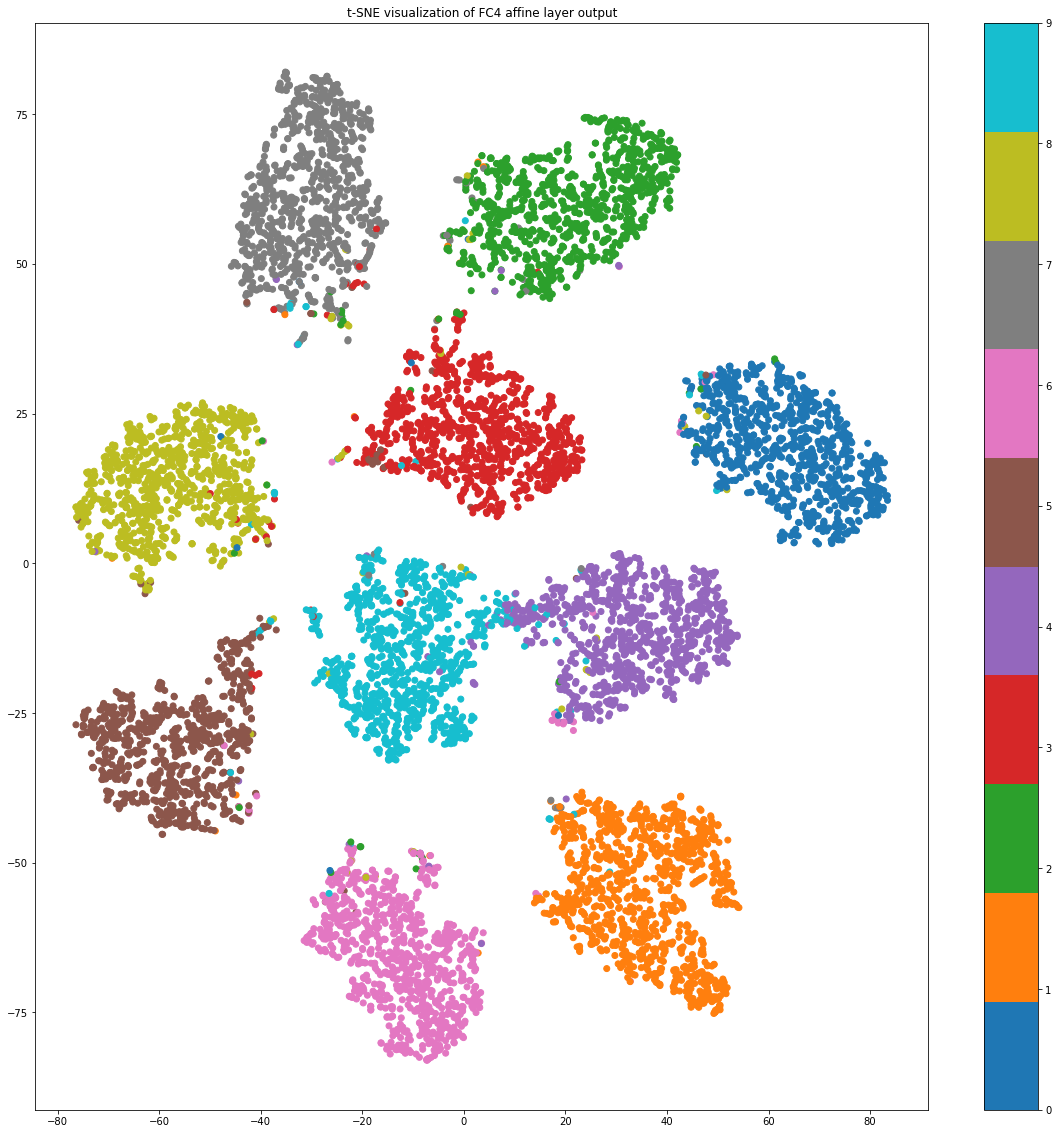

In [15]:
colormap = matplotlib.cm.get_cmap('Vega10')

plt.figure(figsize=(20, 20))
plt.scatter(fc4_tsne_codes[:,0], fc4_tsne_codes[:, 1], c=img_labels, cmap=colormap)
plt.colorbar()
plt.title('t-SNE visualization of FC4 affine layer output')
plt.savefig('results/1-fc-mnist/fc_out_tsne/tsne_fc4_output.png')

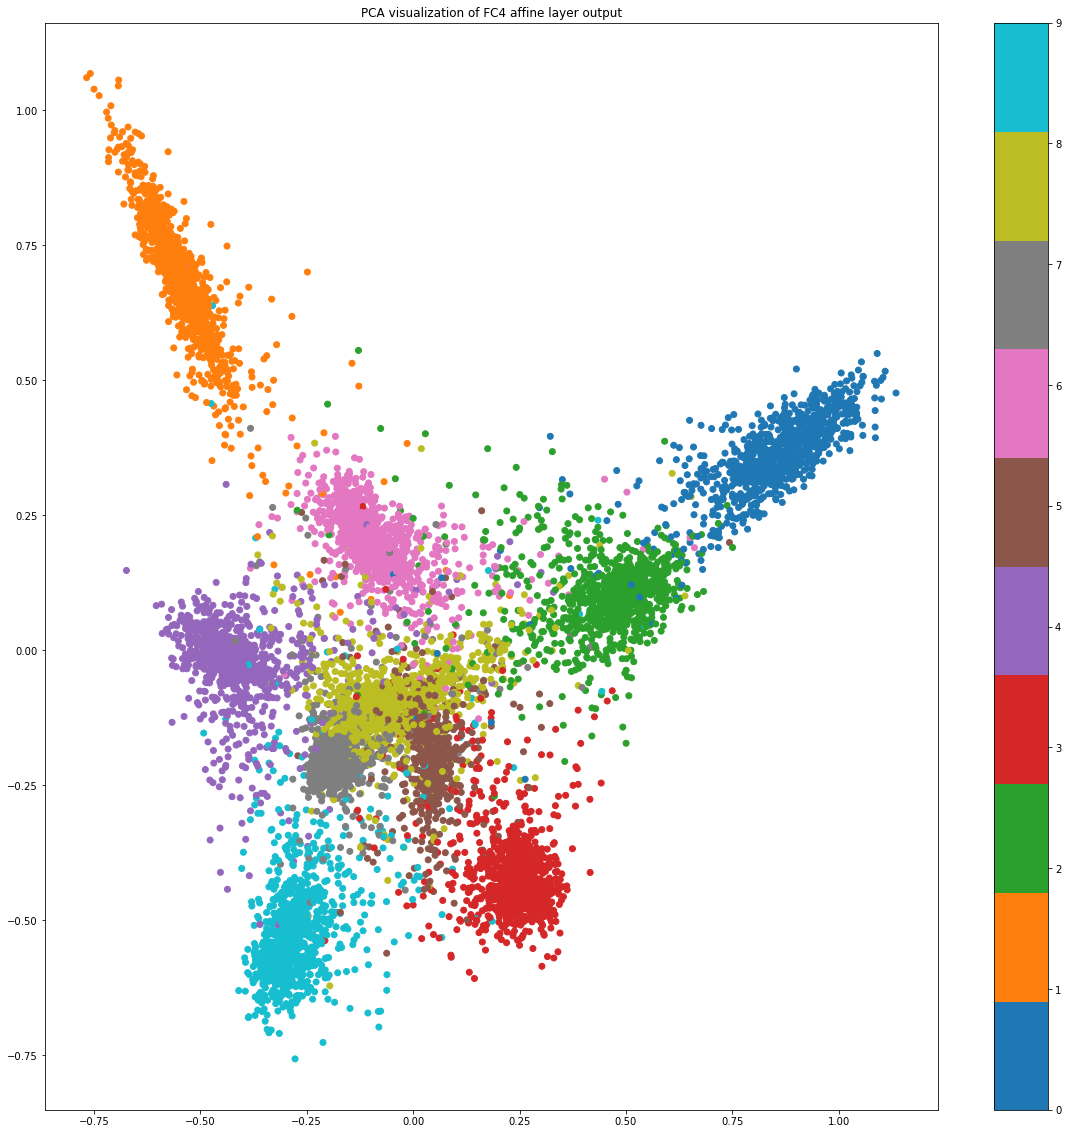

In [16]:
colormap = matplotlib.cm.get_cmap('Vega10')

plt.figure(figsize=(20, 20))
plt.scatter(fc4_pca_codes[:,0], fc4_pca_codes[:, 1], c=img_labels, cmap=colormap)
plt.colorbar()
plt.title('PCA visualization of FC4 affine layer output')
plt.savefig('results/1-fc-mnist/fc_out_tsne/pca_fc4_output.png')

In [18]:
# Individual neuron activations

IMG_PER_NEURON = 50

bn1_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

bn2_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

bn3_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

bn4_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

def append_data_to_dict(datadict, key, outputs, samples, neurons, reverse=False):
    global inputs, labels, IMG_PER_NEURON
    
    l = len(samples)
    
    for i in xrange(l):
        sample, neuron = samples[i], neurons[i]
        label = labels[sample]
        
        neuron_output = outputs[sample, neuron]
        img = inputs[sample].clone()
        
        if neuron not in datadict[key]:
            datadict[key][neuron] = []
        datadict[key][neuron].append((neuron_output, label, img))
        
        datadict[key][neuron] = sorted(
            datadict[key][neuron], key=lambda x: x[0], reverse=reverse
        )[:IMG_PER_NEURON]
        

def capture_bn_output(outputs, datadict):
    
    max_samples, max_neurons = np.where(outputs > 0.5)
    spos_samples, spos_neurons = np.where((outputs > 0) & (outputs <= 0.5))
    zero_samples, zero_neurons = np.where(outputs == 0)
    sneg_samples, sneg_neurons = np.where((outputs < 0) & (outputs >= -0.5))
    min_samples, min_neurons = np.where(outputs < -0.5)
    
    append_data_to_dict(datadict, 'maximum', outputs, max_samples, max_neurons, reverse=True)
    append_data_to_dict(datadict, 'spositive', outputs, spos_samples, spos_neurons, reverse=True)
    append_data_to_dict(datadict, 'zero', outputs, zero_samples, zero_neurons)
    append_data_to_dict(datadict, 'snegative', outputs, sneg_samples, sneg_neurons, reverse=False)
    append_data_to_dict(datadict, 'minimum', outputs, min_samples, min_neurons, reverse=False)
    

def bn1_out(model, inp, outputs):
    global bn1_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn1_imgs)
    
def bn2_out(model, inp, outputs):
    global bn2_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn2_imgs)

def bn3_out(model, inp, outputs):
    global bn3_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn3_imgs)
    
def bn4_out(model, inp, outputs):
    global bn4_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn4_imgs)

In [19]:
handles = []
handles.append(model.bn1.register_forward_hook(bn1_out))
handles.append(model.bn1.register_forward_hook(bn2_out))
handles.append(model.bn1.register_forward_hook(bn3_out))
handles.append(model.bn1.register_forward_hook(bn4_out))

cnt = 0

try:
    for i, data in enumerate(test_data):

        inputs, labels = data
        inputs_var = Variable(inputs)

        output = model(inputs_var)

        if img_labels.shape[0] <= 0:
            img_labels = labels.numpy()
        else:
            img_labels = np.append(img_labels, labels.numpy())

        cnt += labels.shape[0]
        print "%d processed" % cnt
        if cnt > 1000:
            break
finally:
    for handle in handles:
        handle.remove()

256 processed
512 processed
768 processed
1024 processed


In [ ]:
NUM_CLASSES = 10
CLASSES = range(10)

def mkfolder(folderpath):
    try:
        os.makedirs(folderpath)
    except Exception as _:
        pass

def savedict(datadict, bn_id):
    
    global NUM_CLASSES, CLASSES
    
    for clf, clf_data in datadict.iteritems():
        for neuronid, imgdata in clf_data.iteritems():
            print "Classification: %s, Neuron: %s" % (str(clf), str(neuronid))
            
            folderpath = 'results/1-fc-mnist/activations/' + bn_id + '/' + str(clf) + '/' + str(neuronid) + '/'
            mkfolder(folderpath)
            
            freq = {}

            for i, (score, label, img) in enumerate(imgdata):
                freq[label] = freq.get(label, 0) + 1
                filename = folderpath + str(label) + ', ' + str(score) + ' - ' + str(i) + '.png'
                
                plt.figure()
                plt.imshow(img.view(28, 28).numpy(), cmap='gray')
                plt.title('BN: %s, Neuron: %d, Score: %f' % (bn_id, neuronid, score))
                plt.savefig(filename)
                plt.close()
            
            
            # plot histogram
            pos = np.arange(NUM_CLASSES)
            frequencies = [freq.get(x, 0) for x in CLASSES]
            
            plt.figure()
            ax = plt.axes()
            ax.set_xticks(pos)
            ax.set_xticklabels(CLASSES)

            plt.bar(pos, frequencies, color='r')
            plt.savefig(folderpath + 'histogram.png')
            plt.close()

savedict(bn4_imgs, 'bn4')
savedict(bn3_imgs, 'bn3')
savedict(bn2_imgs, 'bn2')
savedict(bn1_imgs, 'bn1')

Classification: snegative, Neuron: 0
Classification: snegative, Neuron: 1
Classification: snegative, Neuron: 2
Classification: snegative, Neuron: 4
Classification: snegative, Neuron: 5
Classification: snegative, Neuron: 6
Classification: snegative, Neuron: 7
Classification: snegative, Neuron: 8
Classification: snegative, Neuron: 9
Classification: snegative, Neuron: 10
Classification: snegative, Neuron: 12
Classification: snegative, Neuron: 13
Classification: snegative, Neuron: 14
Classification: snegative, Neuron: 15
Classification: snegative, Neuron: 16
Classification: snegative, Neuron: 18
Classification: snegative, Neuron: 19
Classification: snegative, Neuron: 20
Classification: snegative, Neuron: 21
Classification: snegative, Neuron: 23
Classification: snegative, Neuron: 24
Classification: snegative, Neuron: 25
Classification: snegative, Neuron: 26
Classification: snegative, Neuron: 27
Classification: snegative, Neuron: 28
Classification: snegative, Neuron: 29
Classification: snega